## Keras-CNN-CIFAR-10 
## CIFAR-10 | CNN | CLASSIFIER | TENSORFLOW | KERAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
# import datasets cifar 10
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

## Visual images

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

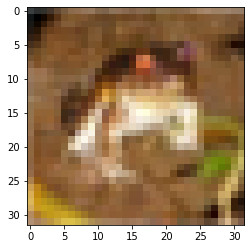

In [6]:
plt.imshow(x_train[0]);

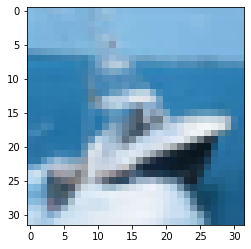

In [7]:
plt.imshow(x_train[8]);

## Preprocessing data y | label | hot end coding

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
# mencari nilai classes
y_classes = to_categorical(y_train)

In [12]:
y_classes.shape

(50000, 10)

In [13]:
y_classes.shape[1]

10

In [14]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [15]:
y_cat_test = to_categorical(y_test, num_classes=10 )

----
## Normalization data x

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
x_train[0].max()

255

In [19]:
x_train[0].min()

0

In [20]:
x_train = x_train/255

In [21]:
x_test = x_test/255

In [22]:
x_train.ndim

4

-----
## Create Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 256)               2

## Add EarlyStopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

----
## Fitting Model

In [28]:
model.fit(x_train, y_cat_train, 
          epochs = 20, 
          validation_data= (x_test, y_cat_test), 
          callbacks =[early_stop])

Epoch 1/20
1563/1563 [==============================] - 101s 56ms/step - loss: 1.4782 - accuracy: 0.4659 - val_loss: 1.2002 - val_accuracy: 0.5744
Epoch 2/20
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1452 - accuracy: 0.5970 - val_loss: 1.0589 - val_accuracy: 0.6298
Epoch 3/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0019 - accuracy: 0.6469 - val_loss: 0.9951 - val_accuracy: 0.6514
Epoch 4/20
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9036 - accuracy: 0.6832 - val_loss: 0.9485 - val_accuracy: 0.6646
Epoch 5/20
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8181 - accuracy: 0.7112 - val_loss: 0.9010 - val_accuracy: 0.6881
Epoch 6/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7546 - accuracy: 0.7336 - val_loss: 0.9047 - val_accuracy: 0.6927
Epoch 7/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6942 - accuracy: 0.7545 - val_loss: 0.8831 

## Evaluation

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.478175,0.46586,1.200229,0.5744
1,1.145183,0.59702,1.058925,0.6298
2,1.001945,0.64690,0.995088,0.6514
3,0.903563,0.68322,0.948517,0.6646
4,0.818074,0.71124,0.900990,0.6881
5,0.754554,0.73356,0.904729,0.6927
6,0.694207,0.75452,0.883100,0.6945
7,0.640349,0.77362,0.889037,0.7052
8,0.591544,0.78970,0.907676,0.7059


In [31]:
plt.style.use(['science','notebook','grid'])

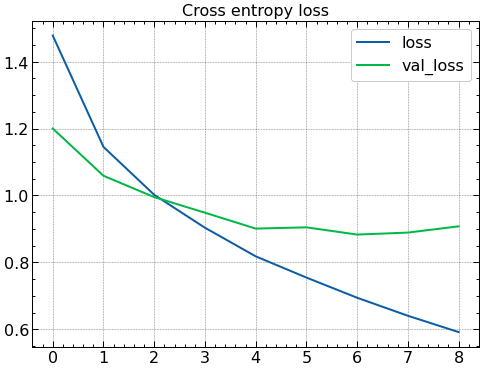

In [32]:
losses[['loss','val_loss']].plot()
plt.title('Cross entropy loss');

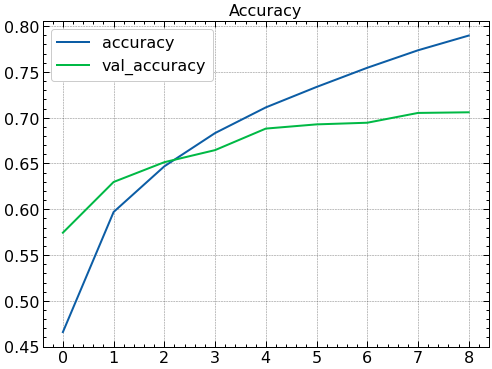

In [33]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9077 - accuracy: 0.7059


[0.9076755046844482, 0.7059000134468079]

----------
## Prediction

In [36]:
prediction = np.argmax(model.predict(x_test), axis =-1)

313/313 [==============================] - 5s 14ms/step


In [37]:
y_cat_test.shape

(10000, 10)

In [38]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
prediction 

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

## Evaluation metrics

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.79      0.86      0.82      1000
           2       0.63      0.57      0.60      1000
           3       0.55      0.47      0.51      1000
           4       0.72      0.56      0.63      1000
           5       0.58      0.66      0.62      1000
           6       0.67      0.85      0.75      1000
           7       0.72      0.76      0.74      1000
           8       0.85      0.78      0.81      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [42]:
confusion_matrix(y_test, prediction)

array([[796,  28,  47,  14,   7,  11,  14,  12,  49,  22],
       [ 16, 858,   9,   8,   5,   1,  19,   5,  20,  59],
       [ 67,  10, 574,  52,  68,  75,  93,  46,   8,   7],
       [ 23,  12,  65, 472,  50, 204, 112,  40,   8,  14],
       [ 19,   6,  80,  66, 559,  69,  84,  99,  13,   5],
       [ 13,   6,  38, 149,  20, 662,  45,  55,   8,   4],
       [  9,   7,  37,  39,  19,  25, 852,   7,   3,   2],
       [ 22,   2,  29,  33,  43,  71,  18, 764,   1,  17],
       [ 96,  52,   8,   9,   5,   7,   8,  10, 780,  25],
       [ 38, 111,  17,  18,   4,   7,  19,  17,  27, 742]], dtype=int64)

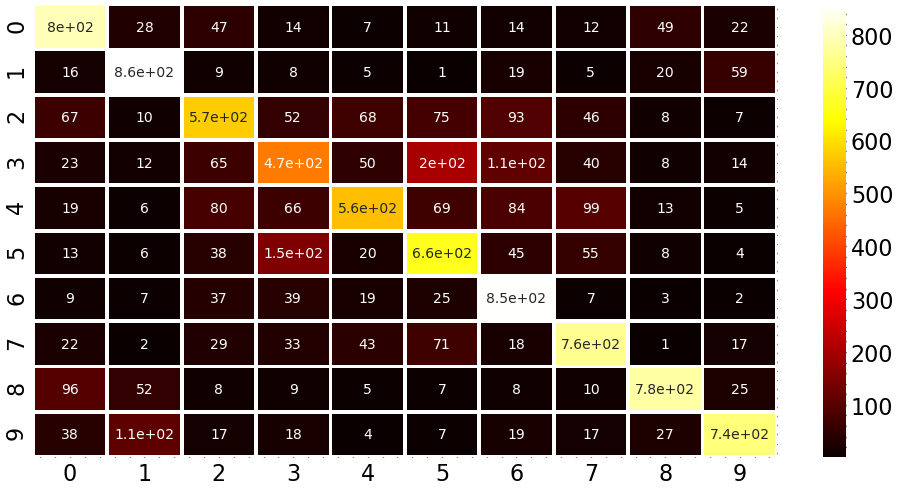

In [43]:
plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, lw=2, cmap='hot');

## Prediction image

In [44]:
test_image = x_test[9]

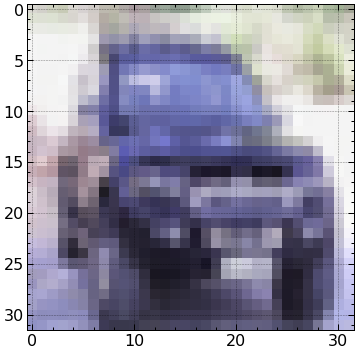

In [45]:
plt.imshow(test_image);

In [46]:
predict = np.argmax(model.predict(test_image.reshape(1,32, 32, 3)), axis=-1)

1/1 [==============================] - 0s 84ms/step


In [47]:
predict

array([1], dtype=int64)

https://www.cs.toronto.edu/~kriz/cifar.html